# STREAMLINE ANALYSIS: Uncovering Trends in Netflix's Library

### 1) Importing all the libraries:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Loading data:

In [37]:
netflix=pd.read_csv("netflix_titles_2021.csv")

### 3)Data inspection:

In [38]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [39]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are 8807 rows of data and 12 columns

In [40]:
#Structure od dataset
netflix.shape

(8807, 12)

In [41]:
#  Retriving all the columns name:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 4) Checking for Missing values:

In [42]:
netflix.isnull()
# Returns True for null values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
# Total missing values basis of columns:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [44]:
# Total missing values in whole dataset:
netflix.isnull().sum().sum()

4307

We can see, there are 4307 missing values are present in the considered dataset.

### 5) Handling missing values:

In [45]:
#Fillingmissing director name as "Unknown"
netflix["director"].fillna('Unknown',inplace=True)

# Filling  missing cast name as "unknown"
netflix["cast"].fillna('Unknown',inplace=True)

# Filling rating values with the "NA"
netflix["rating"].fillna("NA", inplace=True)

# Filling country missing values as "Not Available":
netflix["country"].fillna("Not Available",inplace=True)

# Filling missing duration values as the "Not Available"
netflix["duration"].fillna("Not Available",inplace=True)

In [46]:
#If we check for Null counts:
netflix.isnull().sum().sum()

10

These 10 missing values are of column date_added.This column is in object type ,we can convert it datetime datype using .to_datetime()

In [47]:
# Converting object datype to datetime datatype:
netflix["date_added"]=pd.to_datetime(netflix["date_added"],errors="coerce")

In [48]:
netflix["date_added"].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

Now we can see all the date of date_added columns are of datetime datatype

In [49]:
# Filling missing date_added values as "Not Available":
netflix["date_added"].fillna("Not Available",inplace=True)

In [50]:
netflix.isnull().sum().sum()

0

No NULL values are there in our dataset.

### 6) Checking for Duplicate rows:

In [51]:
netflix.duplicated().sum()

0

There is No Duplicate values

### 7)Creating a Subset of Movies Released After 2015:

In [52]:
movies_released_after_2015=netflix[netflix["release_year"]>2015]
movies_released_after_2015.shape[0]

5656

We can see there are 5656 movies which are released after 2015

### 8) print all the unique genres

In [53]:
netflix["listed_in"].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

There are multiple comma seperated values.

### 9)print all the movies from specific genre

In [54]:
# Filtering Based on specific genre
crime_genre=netflix[netflix["listed_in"].str.contains("Crime")]
#crime_movies.head()
crime_genre.shape[0]

470

There 470 movies/shows which realated to crime genre.

### 10) How many TV Shows are there in netflix library?

In [55]:
tv_shows = netflix[netflix['type'] == 'TV Show']
tv_shows.shape[0]

2676

There are 2676 TV Shows

### 11)Creating a Subset Based on Duration:

In [56]:
# Create a function to extract numeric values from the duration column
def extract_duration(duration):
    if 'min' in duration:
        return int(duration.replace(' min', ''))
    elif 'Seasons' in duration:
        return 0  
    else:
        return None  

# Apply the function to the duration column
netflix['duration_numeric'] = netflix['duration'].apply(extract_duration)

# Now, filter for movies with a duration greater than 90 minutes using the numeric column
long_movies = netflix[netflix['duration_numeric'] > 90]

# Display the results
long_movies.shape[0]


4138

This contains only the movies/shows which are of duration more than 90 mins

### 12)List out Countries listed

In [203]:
unique_country=netflix["country"].unique()
unique_country

array(['United States', 'South Africa', 'Not Available', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States

In [58]:
#Lets see how  many movies are listed of country India
indian_content=netflix[netflix["country"].str.contains("India")]
indian_content.shape[0]

1046

There are 1046 contents in dataset belongs to the Indian contents

## Descriptive analysis

In [59]:
netflix.describe()

,release_year,duration_numeric
count,8807.000000,7011.000000
mean,2014.180198,87.035944
std,8.819312,42.323007
min,1925.000000,0.000000
25%,2013.000000,74.000000
50%,2017.000000,95.000000
75%,2019.000000,111.000000
max,2021.000000,312.000000


### 13)What are the most common genres in the dataset?

In [60]:
genres_split=netflix["listed_in"].str.split(",\s*",expand=True).stack()

genre_counts=genres_split.value_counts()

genre_counts

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [61]:
# The most common genres are
genre_counts.head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
dtype: int64

### 14)What is the distribution of content release years in the dataset?

In [62]:
release_yearwise_distribution=netflix["release_year"].value_counts().sort_index()
release_yearwise_distribution

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

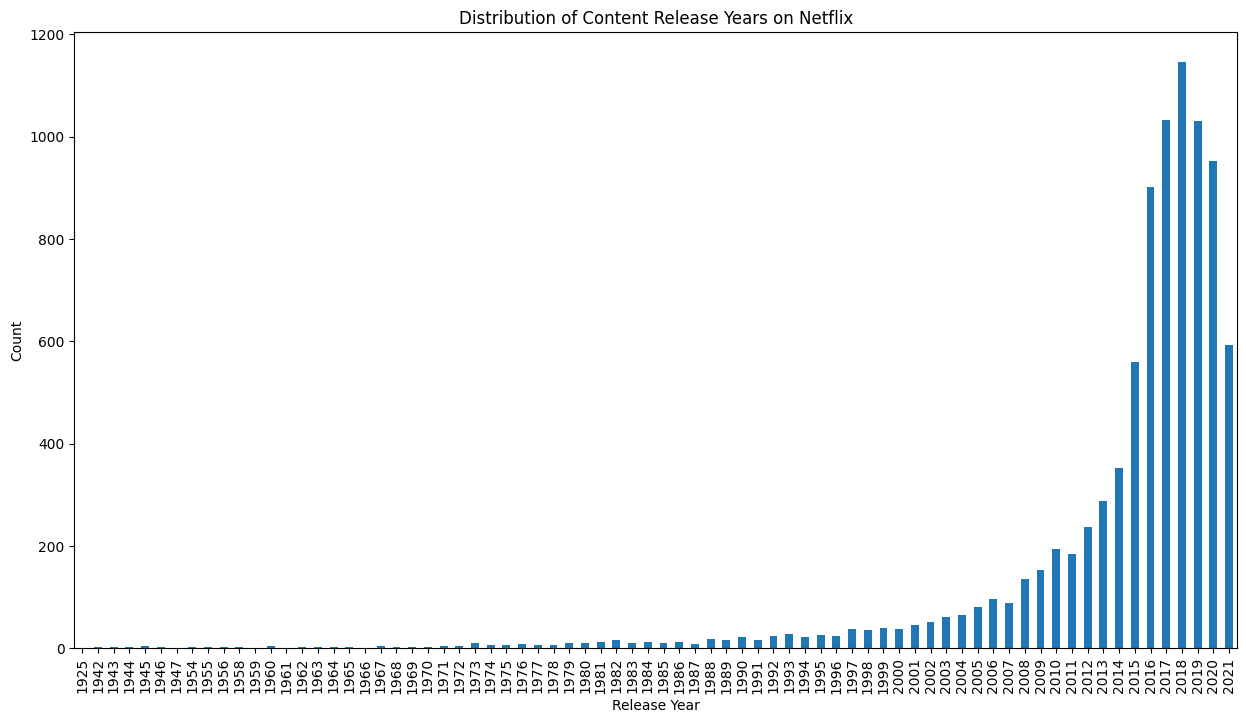

In [63]:
#plot the histogram of the release year:
plt.figure(figsize=(15,8))
release_yearwise_distribution.plot(kind="bar")
plt.title('Distribution of Content Release Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

The distribution of content release years on Netflix shows a significant increase in the number of films and shows after 2015,
with 2018 being the peak year. This trend indicates that Netflix ramped up content production and acquisitions in recent years,
possibly to meet the growing demand for streaming content and expand its global presence.

### 15)What are the top 5 countries producing the most content on Netflix?

In [64]:
countries_split=netflix["country"].str.split(",\s*",expand=True).stack()

top_5_countries=countries_split.value_counts().head()

top_5_countries


United States     3690
India             1046
Not Available      831
United Kingdom     806
Canada             445
dtype: int64

Text(0, 0.5, 'Count')

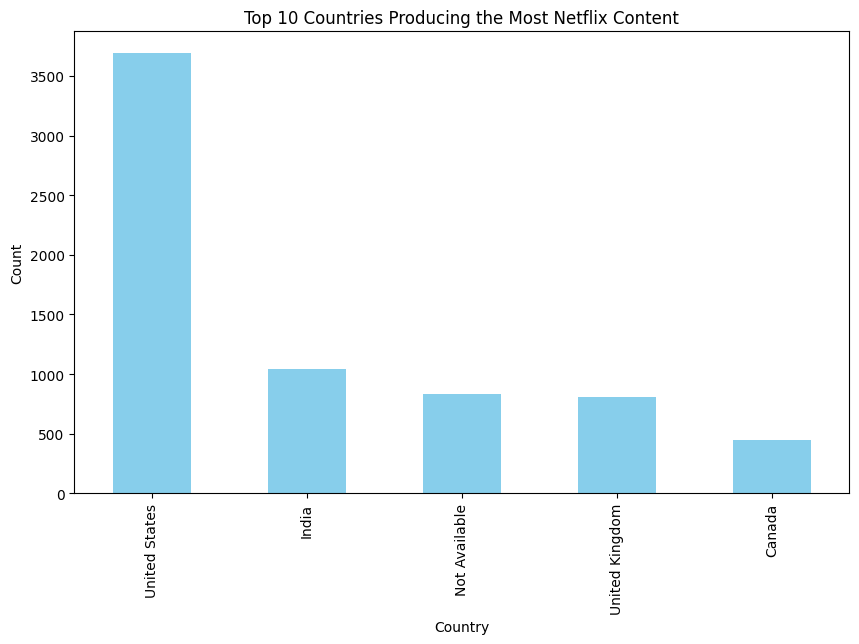

In [65]:
#plotting the graph
plt.figure(figsize=(10,6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Producing the Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Count')

## Country-wise Analysis

### 16)What is the trend of content production across different countries over the years?

In [71]:
# Split the 'country' column if multiple countries are listed for a single title
countries_split = netflix['country'].str.split(',\s*', expand=True).stack().reset_index(level=1, drop=True)
countries_split.head()

0    United States
1     South Africa
2    Not Available
3    Not Available
4            India
dtype: object

In [67]:
# Create a new DataFrame with 'release_year' and the split countries
netflix_countries = netflix[['release_year']].join(countries_split.rename('country'))
netflix_countries

,release_year,country
0,2020,United States
1,2021,South Africa
2,2021,Not Available
3,2021,Not Available
4,2021,India
...,...,...
8802,2007,United States
8803,2018,Not Available
8804,2009,United States
8805,2006,United States


In [68]:
# Group by 'release_year' and 'country' and count the number of titles per year for each country
country_yearly_trend = netflix_countries.groupby(['release_year', 'country']).size().unstack().fillna(0)
country_yearly_trend

country,,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
release_year,,,,,,,,,,,,,,,,,,,,,
1925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.0,0.0,0.0,0.0,0.0,14.0,1.0,20.0,2.0,0.0,...,1.0,3.0,101.0,442.0,3.0,0.0,1.0,0.0,0.0,2.0
2018,2.0,0.0,1.0,0.0,0.0,17.0,0.0,20.0,3.0,0.0,...,0.0,6.0,96.0,457.0,3.0,1.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,0.0,0.0,0.0,13.0,0.0,16.0,1.0,0.0,...,0.0,5.0,68.0,428.0,3.0,0.0,0.0,2.0,0.0,0.0


In [69]:
# Select the top 5 countries with the most content across all years
top_countries = countries_split.value_counts().nlargest(5).index
country_yearly_trend_top = country_yearly_trend[top_countries]
country_yearly_trend_top


country,United States,India,Not Available,United Kingdom,Canada
release_year,,,,,
1925,0.0,0.0,1.0,0.0,0.0
1942,2.0,0.0,0.0,0.0,0.0
1943,3.0,0.0,0.0,0.0,0.0
1944,3.0,0.0,0.0,1.0,0.0
1945,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2017,442.0,111.0,66.0,101.0,58.0
2018,457.0,101.0,109.0,96.0,67.0
2019,428.0,93.0,117.0,68.0,44.0


<Figure size 1200x800 with 0 Axes>

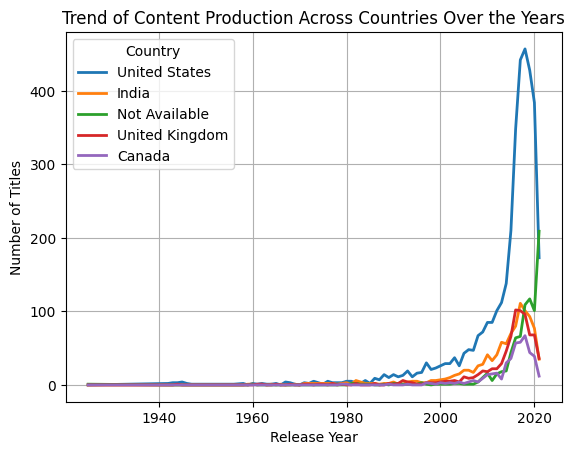

In [70]:
# Plot the trend for the top 5 countries
plt.figure(figsize=(12,8))
country_yearly_trend_top.plot(kind='line', linewidth=2)
plt.title('Trend of Content Production Across Countries Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Country')
plt.grid(True)
plt.show()

### 17)How does the genre distribution vary between two specific countries (e.g., USA vs India)?

In [78]:
# Filter for the USA and India
usa_data = netflix[netflix['country'] == 'United States']
india_data = netflix[netflix['country'] == 'India']
usa_data.shape[0]

2818

In [79]:
# Split genres and count occurrences
usa_genres = usa_data['listed_in'].str.split(',\s*', expand=True).stack().value_counts()
india_genres = india_data['listed_in'].str.split(',\s*', expand=True).stack().value_counts()
usa_genres

Dramas                          591
Comedies                        524
Documentaries                   411
Independent Movies              302
Children & Family Movies        272
Action & Adventure              249
TV Comedies                     234
Stand-Up Comedy                 215
Thrillers                       193
TV Dramas                       189
Romantic Movies                 173
Docuseries                      173
Kids' TV                        146
Horror Movies                   143
Music & Musicals                119
Reality TV                      114
Crime TV Shows                  111
Sci-Fi & Fantasy                107
Sports Movies                    91
TV Action & Adventure            70
Classic Movies                   61
LGBTQ Movies                     55
TV Sci-Fi & Fantasy              47
Science & Nature TV              41
TV Mysteries                     39
Cult Movies                      39
Romantic TV Shows                37
Stand-Up Comedy & Talk Shows

In [81]:
# Create a DataFrame to compare both countries
genre_comparison = pd.DataFrame({
    'USA': usa_genres,
    'India': india_genres
}).fillna(0)

In [93]:
# Normalize the counts to make them comparable
genre_comparison = genre_comparison.astype(int)
genre_comparison_normalized = genre_comparison.div(genre_comparison.sum(axis=0), axis=1) * 100
top_5_genres = genre_comparison_normalized.sort_values(by=genre_comparison_normalized.columns.tolist(), ascending=False).head(5)
top_5_genres

,USA,India
Dramas,11.815274,23.610053
Comedies,10.475810,11.728865
Documentaries,8.216713,0.723534
Independent Movies,6.037585,5.712110
Children & Family Movies,5.437825,0.685453


<Figure size 5000x1000 with 0 Axes>

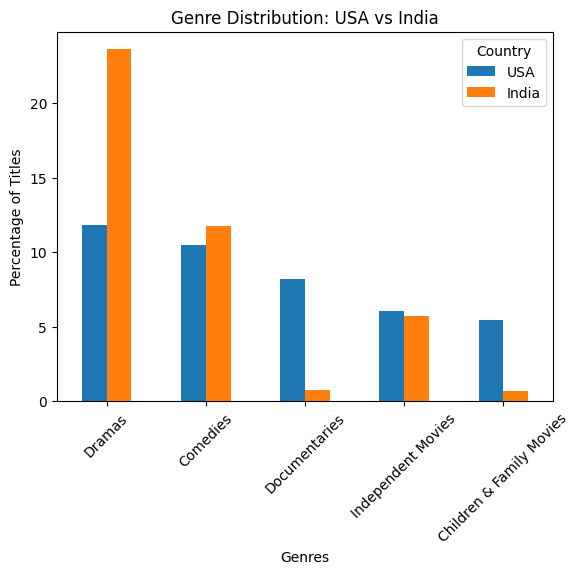

In [95]:
# Plotting
plt.figure(figsize=(50, 10))
top_5_genres.plot(kind='bar')
plt.title('Genre Distribution: USA vs India')
plt.xlabel('Genres')
plt.ylabel('Percentage of Titles')
plt.legend(title='Country')
plt.xticks(rotation=45)

plt.show()

### 18)How has the content production evolved over the years? 

In [99]:
content_trend=netflix["release_year"].value_counts().sort_index()
content_trend

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

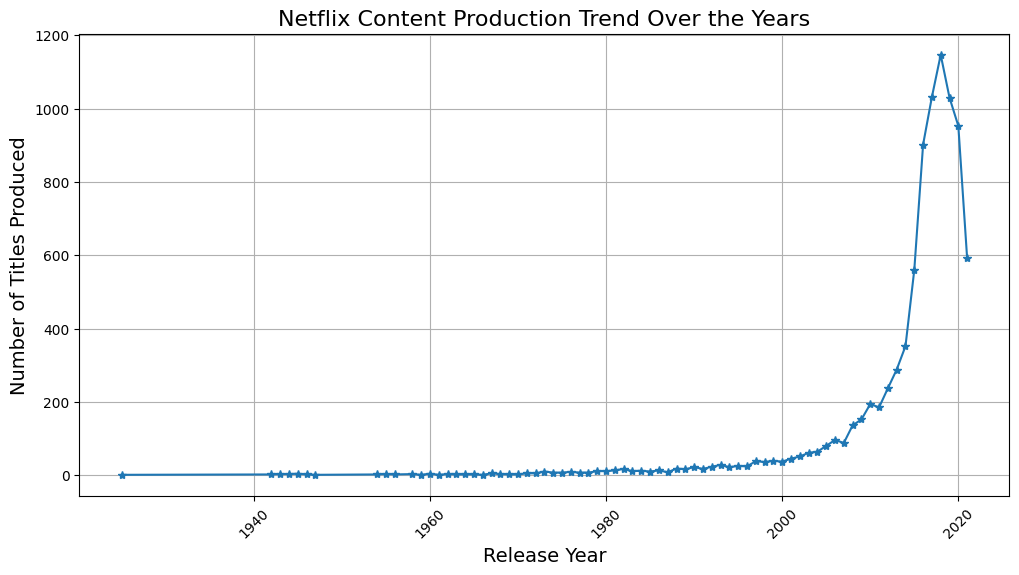

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(content_trend.index, content_trend.values,marker='*')
plt.title('Netflix Content Production Trend Over the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Titles Produced', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### 19)What is the trend in releasing TV shows versus movies over time?

(array([1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

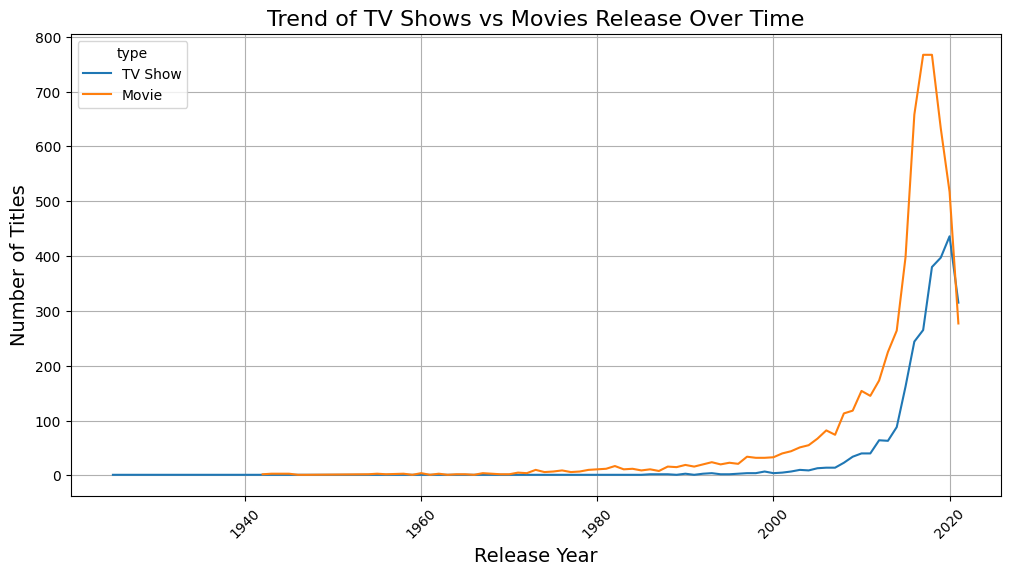

In [114]:
tv_shows_movies_trend=netflix.groupby(["release_year","type"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.lineplot(tv_shows_movies_trend, x='release_year', y='count', hue='type')

plt.title('Trend of TV Shows vs Movies Release Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)


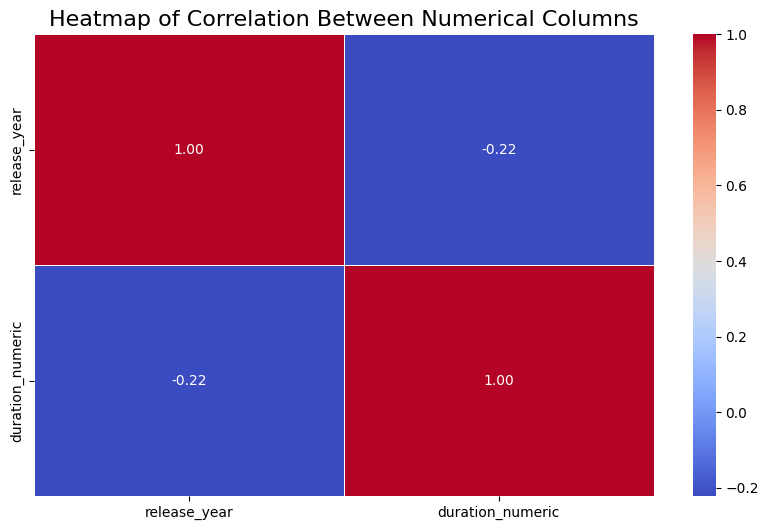

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns from the dataset
numerical_columns = netflix.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Heatmap of Correlation Between Numerical Columns', fontsize=16)

# Show the plot
plt.show()


The weak negative correlation implies that, on average, newer content might tend to be slightly shorter in duration

### 20)visualize the distribution of content durations  for movies usong boxplot

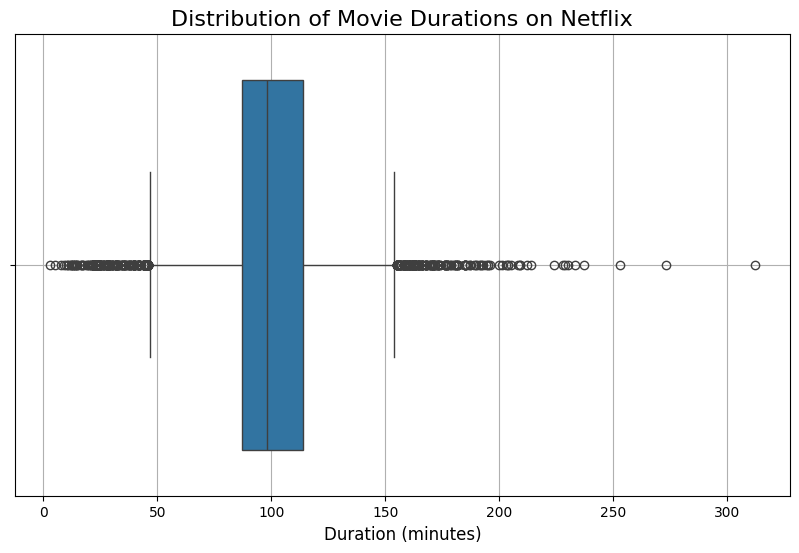

In [206]:
# Filter the dataset for movies
movies_data = netflix[netflix['type'] == 'Movie'].copy()  # Create a copy to avoid SettingWithCopyWarning

# Convert 'duration' column to numeric, if not already
movies_data.loc[:, 'duration_numeric'] = pd.to_numeric(movies_data['duration'].str.replace(' min', ''), errors='coerce')

# Plot the boxplot for movie durations
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies_data['duration_numeric'])

# Add title and labels
plt.title('Distribution of Movie Durations on Netflix', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.grid(True)


The majority of Netflix movies fall between 85 to 110 minutes in duration.
There are some outliers with extremely short or long durations, though these are relatively few compared to the overall distribution.

### 21)Which directors have the highest number of titles on Netflix?

In [126]:
#Extract director coulumn and count occurances"
director_count=netflix["director"].value_counts()
top_10_directors=director_count.head(10)
top_10_directors

Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: director, dtype: int64

We can see there is Unknown column which is there with count of 2634. We need to exclude them before plotting graph

In [128]:
#Excluding Unknown:
top_directors_excluding_unknown=top_10_directors[1:11]
top_directors_excluding_unknown

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Name: director, dtype: int64

#plotting:
plt.figure(figsize=(10,5))
top_directors_excluding_unknown.plot(kind="bar")
plt.title("Top Directors Comparision")
plt.xlabel('Director')
plt.ylabel("Number of Titles")

### 22)visualize the number of titles per cast member, focusing on the top 10

In [160]:
split_casts=netflix["cast"].str.split(",\s*",expand=True).stack().value_counts()
split_casts

Unknown                    825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Length: 36440, dtype: int64

In [161]:
#Just verifying 
split_casts_verify=netflix["cast"].str.contains("Anupam Kher").value_counts()
split_casts_verify

False    8764
True       43
Name: cast, dtype: int64

In [169]:
#Now exclude "Unkown" and plot graph for next top 10...
top_casts=split_casts.head(15).reset_index()
top_10_casts=top_casts[1:12]
top_10_casts.columns=["cast Member","Number of Titles"]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Anupam Kher'),
  Text(1, 0, 'Shah Rukh Khan'),
  Text(2, 0, 'Julie Tejwani'),
  Text(3, 0, 'Naseeruddin Shah'),
  Text(4, 0, 'Takahiro Sakurai'),
  Text(5, 0, 'Rupa Bhimani'),
  Text(6, 0, 'Akshay Kumar'),
  Text(7, 0, 'Om Puri'),
  Text(8, 0, 'Yuki Kaji'),
  Text(9, 0, 'Amitabh Bachchan'),
  Text(10, 0, 'Paresh Rawal')])

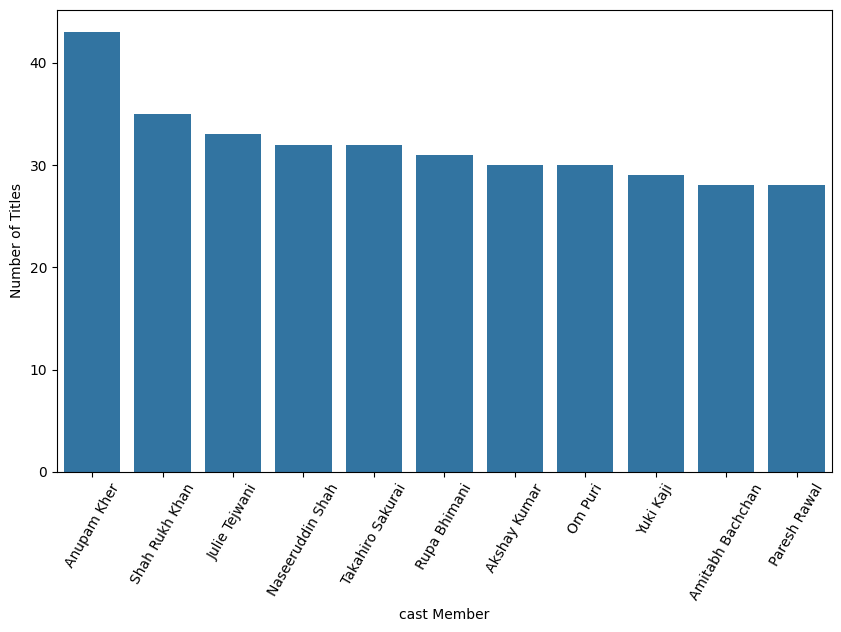

In [176]:
#plotting
plt.figure(figsize=(10,6))
sns.barplot(x="cast Member",y="Number of Titles",data=top_10_casts)
plt.xticks(rotation=60)

### 23) What are the most frequent content ratings on Netflix?

In [177]:
rating_counts = netflix['rating'].value_counts()
rating_counts

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NA             4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

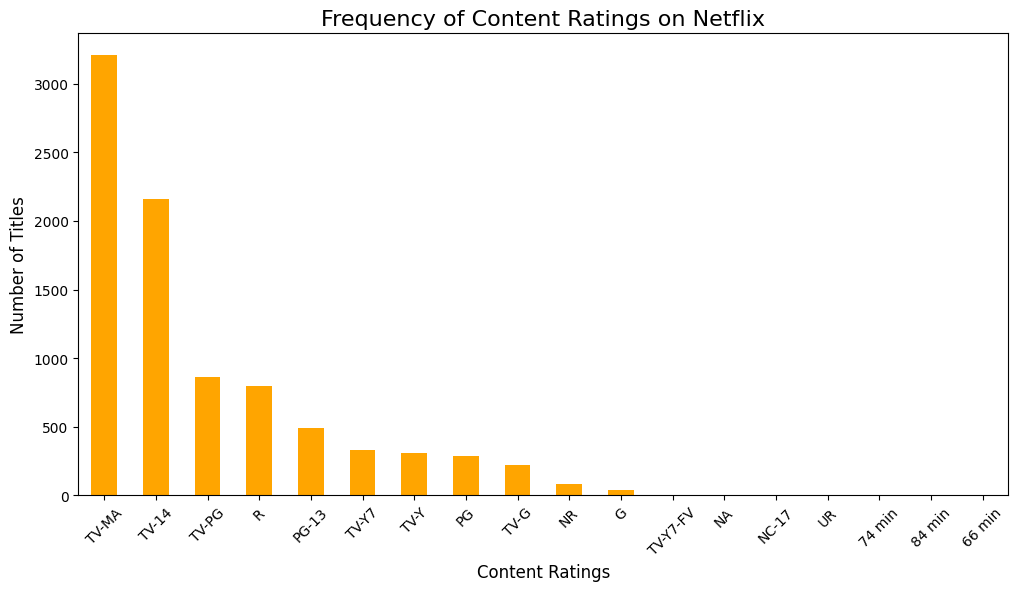

In [180]:
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='orange')
plt.title("Frequency of Content Ratings on Netflix", fontsize=16)
plt.xlabel("Content Ratings", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)

plt.show()

### 24)Relationship between content rating and genre (e.g., are dramas more likely to be rated TV-MA)

In [183]:
# Split the genres and create a new DataFrame
genres_split = netflix['listed_in'].str.split(',\s*', expand=True).stack()
genres_split = genres_split.reset_index(level=1, drop=True)

# Create a DataFrame with 'rating' and the split genres
ratings_genres = netflix[['rating']].join(genres_split.rename('genre'))

# Create a contingency table
contingency_table = pd.crosstab(ratings_genres['rating'], ratings_genres['genre'])
contingency_table = contingency_table.fillna(0) 
contingency_table.head()

genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
rating,,,,,,,,,,,,,,,,,,,,,
66 min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74 min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84 min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,1,0,0,0,33,0,8,11,0,0,...,0,0,0,0,0,0,0,0,0,0
NA,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


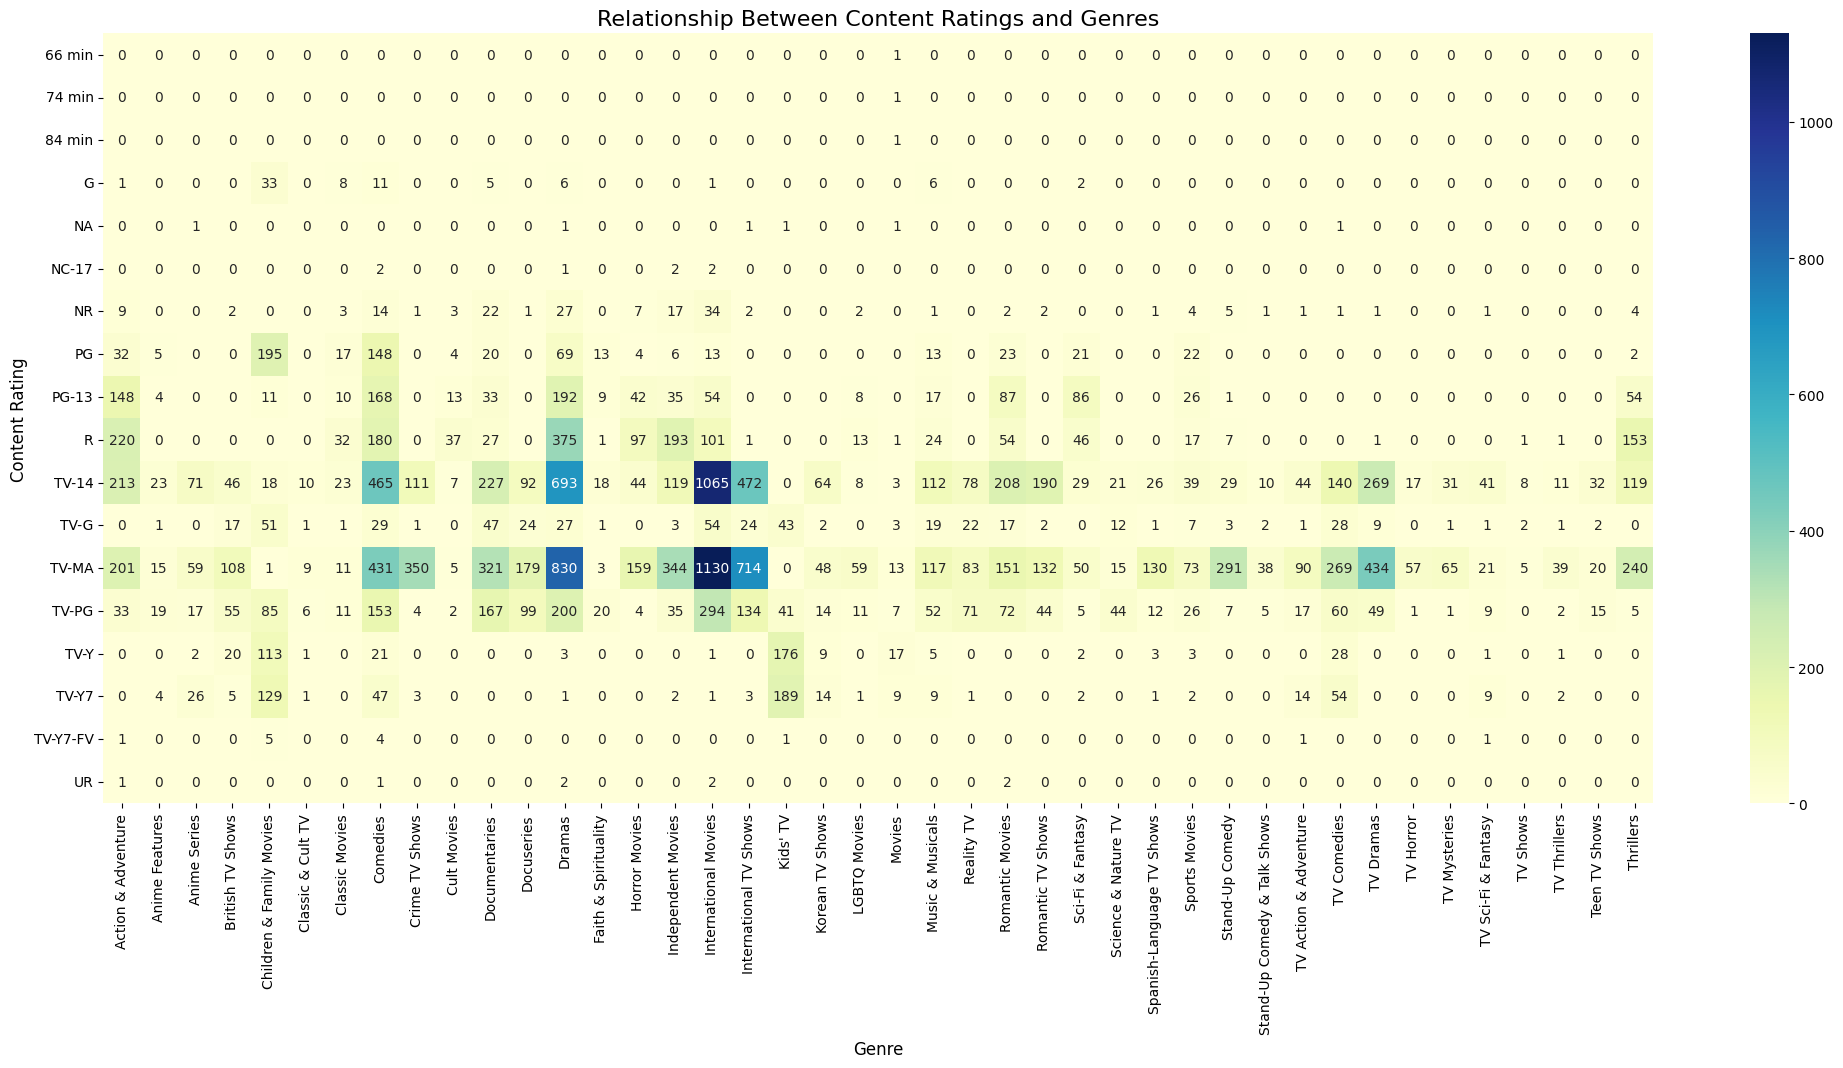

In [188]:
#To visualize relationship using heatmap:
plt.figure(figsize=(25, 10))
sns.heatmap(contingency_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Relationship Between Content Ratings and Genres", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Content Rating", fontsize=12)
plt.xticks(rotation=90)
plt.show()

Let's consider TV-MA  with title count 3207. TV-MA is frequently associated with genres like Drama,International movies, Action & Adventure, and Thrillers.These genres often include mature themes and content.

### 25) What is the distribution of content types (e.g., Movie vs. TV Show) on Netflix?

(-1.0999985007417963,
 1.099999928606752,
 -1.0999991296948166,
 1.0999996605650404)

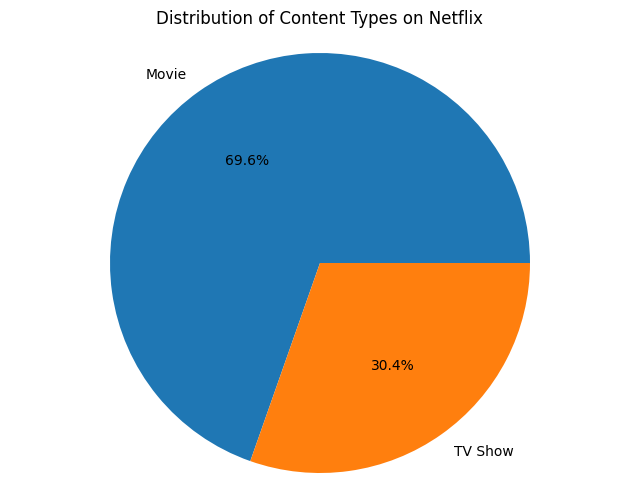

In [197]:
# Count the occurrences of each content type
type_counts = netflix['type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')


Movies constitute 69.6% and TV shows make up 30.4% of the total content

### 26) Content Types by Rating

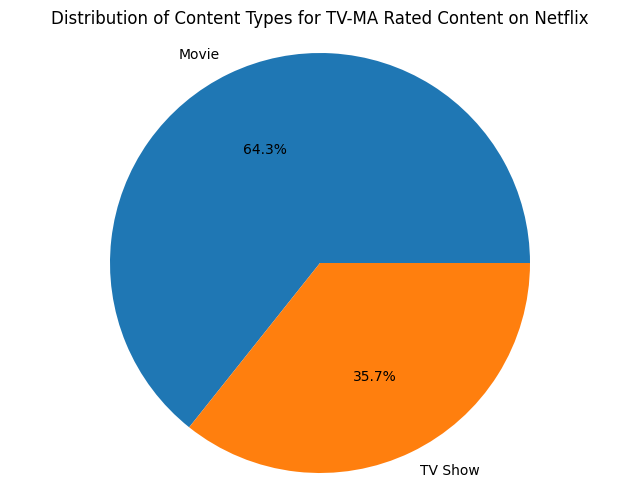

In [201]:
# Filter the dataset for a specific rating, for example, TV-MA
rating_filtered = netflix[netflix['rating'] == 'TV-MA']

# Count the occurrences of each content type in that rating
rating_type_counts = rating_filtered['type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(rating_type_counts, labels=rating_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Content Types for TV-MA Rated Content on Netflix')
plt.axis('equal') 
plt.show()
